In [1]:
from IPython.display import display, Markdown
display(Markdown("## Student Exam Score Predictor"))

## Student Exam Score Predictor

In [2]:
import pandas as pd

In [3]:
from IPython.display import display, Markdown

display(Markdown("## Introduction: Setup"))

## Introduction: Setup

In [4]:
students = pd.read_csv(r"C:\Users\danie\OneDrive\Desktop\Projects\StudentGradePredictor\Expanded_data_with_more_features.csv", usecols=lambda column: column != "Unnamed: 0")

In [5]:
print("""
---columns---
Gender: Gender of the student (male/female)
EthnicGroup: Ethnic group of the student (group A to E)
ParentEduc: Parent(s) education background (from some_highschool to master's degree)
LunchType: School lunch type (standard or free/reduced)
TestPrep: Test preparation course followed (completed/none)
ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
PracticeSport: How often the student practices sport (never/sometimes/regularly)
IsFirstChild: If the child is the first child in the family or not (yes/no)
NrSiblings: Number of siblings the student has (0 to 7)
TransportMeans: Means of transport to school (schoolbus/private)
WklyStudyHours: Weekly self-study hours (less than 5hrs/between 5 and 10hrs/more than 10hrs)
MathScore: Math test score (0-100)
ReadingScore: Reading test score (0-100)
WritingScore: Writing test score (0-100)
""")


---columns---
Gender: Gender of the student (male/female)
EthnicGroup: Ethnic group of the student (group A to E)
ParentEduc: Parent(s) education background (from some_highschool to master's degree)
LunchType: School lunch type (standard or free/reduced)
TestPrep: Test preparation course followed (completed/none)
ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
PracticeSport: How often the student practices sport (never/sometimes/regularly)
IsFirstChild: If the child is the first child in the family or not (yes/no)
NrSiblings: Number of siblings the student has (0 to 7)
TransportMeans: Means of transport to school (schoolbus/private)
WklyStudyHours: Weekly self-study hours (less than 5hrs/between 5 and 10hrs/more than 10hrs)
MathScore: Math test score (0-100)
ReadingScore: Reading test score (0-100)
WritingScore: Writing test score (0-100)



In [6]:
students

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [7]:
students = students.drop_duplicates()

In [8]:
students = students.dropna()
students.shape
students = students.reset_index()

In [9]:
print(students.dtypes)

index                    int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


In [10]:
students["GenderCode"] = students["Gender"].astype("category").cat.codes

In [11]:
students["EthnicGroupCode"] = students["EthnicGroup"].astype("category").cat.codes

In [12]:
students["ParentEducCode"] = students["ParentEduc"].astype("category").cat.codes

In [13]:
students["LunchTypeCode"] = students["LunchType"].astype("category").cat.codes

In [14]:
students["TestPrepCode"] = students["TestPrep"].astype("category").cat.codes

In [15]:
students["ParentMaritalStatusCode"] = students["ParentMaritalStatus"].astype("category").cat.codes

In [16]:
students["PracticeSportCode"] = students["PracticeSport"].astype("category").cat.codes

In [17]:
students["IsFirstChildCode"] = students["IsFirstChild"].astype("category").cat.codes

In [18]:
students["TransportMeansCode"] = students["TransportMeans"].astype("category").cat.codes

In [19]:
students["WklyStudyHoursCode"] = students["WklyStudyHours"].astype("category").cat.codes

In [20]:
students.head()

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,...,GenderCode,EthnicGroupCode,ParentEducCode,LunchTypeCode,TestPrepCode,ParentMaritalStatusCode,PracticeSportCode,IsFirstChildCode,TransportMeansCode,WklyStudyHoursCode
0,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,...,0,1,3,1,1,2,2,1,1,1
1,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,...,1,2,4,1,1,1,2,1,1,0
2,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,...,0,1,0,1,1,1,1,1,1,0
3,6,female,group B,some college,standard,completed,widowed,never,no,1.0,...,0,1,4,1,0,3,0,0,0,0
4,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,...,1,1,4,0,1,1,2,1,0,2


In [21]:
students_corr = students.corr(numeric_only=True)
print(students_corr.loc[:, "MathScore"])

index                     -0.002172
NrSiblings                 0.003748
MathScore                  1.000000
ReadingScore               0.818986
WritingScore               0.808533
GenderCode                 0.157376
EthnicGroupCode            0.223355
ParentEducCode            -0.115788
LunchTypeCode              0.372977
TestPrepCode              -0.142680
ParentMaritalStatusCode   -0.004175
PracticeSportCode          0.017055
IsFirstChildCode           0.008258
TransportMeansCode         0.006377
WklyStudyHoursCode         0.018446
Name: MathScore, dtype: float64


In [22]:
students_corr = students.corr(numeric_only=True)
print(students_corr.loc[:, "WritingScore"])

index                     -0.000909
NrSiblings                 0.003060
MathScore                  0.808533
ReadingScore               0.952621
WritingScore               1.000000
GenderCode                -0.293227
EthnicGroupCode            0.166344
ParentEducCode            -0.132122
LunchTypeCode              0.278539
TestPrepCode              -0.294047
ParentMaritalStatusCode   -0.003137
PracticeSportCode          0.004439
IsFirstChildCode           0.002155
TransportMeansCode         0.000672
WklyStudyHoursCode         0.011859
Name: WritingScore, dtype: float64


In [23]:
students_corr = students.corr(numeric_only=True)
print(students_corr.loc[:, "ReadingScore"])

index                     -0.002577
NrSiblings                 0.002278
MathScore                  0.818986
ReadingScore               1.000000
WritingScore               0.952621
GenderCode                -0.242869
EthnicGroupCode            0.150590
ParentEducCode            -0.119008
LunchTypeCode              0.262362
TestPrepCode              -0.212743
ParentMaritalStatusCode   -0.003870
PracticeSportCode          0.005086
IsFirstChildCode           0.006805
TransportMeansCode         0.000812
WklyStudyHoursCode         0.003996
Name: ReadingScore, dtype: float64


In [24]:
students.shape

(19243, 25)

In [25]:
train = students[students.index <= 15394].copy()
test = students[students.index > 15394].copy()

In [26]:
train.shape

(15395, 25)

In [27]:
test.shape

(3848, 25)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
display(Markdown("## Model 1: Math Score Predictor"))
print("--Getting math score while knowing writing and reading scores--")

## Model 1: Math Score Predictor

--Getting math score while knowing writing and reading scores--


In [30]:
predictors1 = [
    "NrSiblings",
    "ReadingScore",
    "WritingScore",
    "GenderCode",
    "EthnicGroupCode",
    "ParentEducCode",
    "LunchTypeCode",
    "TestPrepCode",
    "ParentMaritalStatusCode",
    "PracticeSportCode",
    "IsFirstChildCode",
    "TransportMeansCode",
    "WklyStudyHoursCode"
]

target1 = "MathScore"

In [31]:
reg.fit(train[predictors1], train["MathScore"])

LinearRegression()

In [32]:
predictions1 = reg.predict(test[predictors1])

In [33]:
predictions1
print(predictions1.shape)
print(test.shape)

(3848,)
(3848, 25)


In [34]:
test["MathScorePredictions"] = predictions1
test["MathScorePredictions"] = test["MathScorePredictions"].round()

In [35]:
pd.set_option("display.max_columns", None)
test

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,GenderCode,EthnicGroupCode,ParentEducCode,LunchTypeCode,TestPrepCode,ParentMaritalStatusCode,PracticeSportCode,IsFirstChildCode,TransportMeansCode,WklyStudyHoursCode,MathScorePredictions
15395,24517,female,group E,master's degree,standard,none,married,sometimes,yes,1.0,private,5 - 10,94,90,98,0,4,3,1,1,1,2,1,0,0,90.0
15396,24518,female,group B,high school,standard,none,single,sometimes,no,5.0,private,< 5,62,75,72,0,1,2,1,1,2,2,0,0,1,66.0
15397,24519,male,group D,high school,standard,completed,single,regularly,no,2.0,private,< 5,91,89,87,1,3,2,1,0,2,1,0,0,1,91.0
15398,24520,male,group B,some high school,standard,none,married,regularly,no,4.0,private,5 - 10,63,68,60,1,1,5,1,1,1,1,0,0,0,68.0
15399,24522,male,group B,some college,standard,none,single,sometimes,yes,0.0,school_bus,< 5,89,85,79,1,1,4,1,1,2,2,1,1,1,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49,1,2,4,1,1,1,1,0,1,0,58.0
19239,30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,0,3,2,1,1,2,2,0,1,0,59.0
19240,30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,1,4,2,1,1,2,1,0,0,0,61.0
19241,30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,0,3,0,1,0,1,1,0,1,0,82.0


In [36]:
from sklearn.metrics import mean_absolute_error

error1 = mean_absolute_error(test["MathScore"], test["MathScorePredictions"])

In [37]:
error1

4.461538461538462

In [38]:
students.describe()["MathScore"]

count    19243.000000
mean        66.635504
std         15.362362
min          0.000000
25%         56.000000
50%         67.000000
75%         78.000000
max        100.000000
Name: MathScore, dtype: float64

In [39]:
errorABS1 = (test["MathScore"] - test["MathScorePredictions"]).abs()
errorABS1

15395    4.0
15396    4.0
15397    0.0
15398    5.0
15399    3.0
        ... 
19238    0.0
19239    0.0
19240    3.0
19241    0.0
19242    0.0
Length: 3848, dtype: float64

In [40]:
errorRatio1 = errorABS1 / test["MathScorePredictions"]
errorRatio1

15395    0.044444
15396    0.060606
15397    0.000000
15398    0.073529
15399    0.034884
           ...   
19238    0.000000
19239    0.000000
19240    0.049180
19241    0.000000
19242    0.000000
Length: 3848, dtype: float64

In [41]:
averageErrorRatio1 = errorRatio1.mean()
MathScoreErrorPercentage = round(averageErrorRatio1 * 100, 2)
print(f"The average percent error for math score prediction is: {MathScoreErrorPercentage}%")

The average percent error for math score prediction is: 7.11%


In [42]:
display(Markdown("## Model 2: Writing Score Predictor"))
print("--Getting writing score while knowing math and reading scores--")

## Model 2: Writing Score Predictor

--Getting writing score while knowing math and reading scores--


In [43]:
predictors2 = [
    "NrSiblings",
    "ReadingScore",
    "MathScore",
    "GenderCode",
    "EthnicGroupCode",
    "ParentEducCode",
    "LunchTypeCode",
    "TestPrepCode",
    "ParentMaritalStatusCode",
    "PracticeSportCode",
    "IsFirstChildCode",
    "TransportMeansCode",
    "WklyStudyHoursCode"
]

target2 = "WritingScore"

In [44]:
reg.fit(train[predictors2], train["WritingScore"])

LinearRegression()

In [45]:
predictions2 = reg.predict(test[predictors2])
print(predictions2.shape)
print(test.shape)

(3848,)
(3848, 26)


In [46]:
test["WritingScorePredictions"] = predictions2
test["WritingScorePredictions"] = test["WritingScorePredictions"].round()
test

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,GenderCode,EthnicGroupCode,ParentEducCode,LunchTypeCode,TestPrepCode,ParentMaritalStatusCode,PracticeSportCode,IsFirstChildCode,TransportMeansCode,WklyStudyHoursCode,MathScorePredictions,WritingScorePredictions
15395,24517,female,group E,master's degree,standard,none,married,sometimes,yes,1.0,private,5 - 10,94,90,98,0,4,3,1,1,1,2,1,0,0,90.0,92.0
15396,24518,female,group B,high school,standard,none,single,sometimes,no,5.0,private,< 5,62,75,72,0,1,2,1,1,2,2,0,0,1,66.0,73.0
15397,24519,male,group D,high school,standard,completed,single,regularly,no,2.0,private,< 5,91,89,87,1,3,2,1,0,2,1,0,0,1,91.0,89.0
15398,24520,male,group B,some high school,standard,none,married,regularly,no,4.0,private,5 - 10,63,68,60,1,1,5,1,1,1,1,0,0,0,68.0,62.0
15399,24522,male,group B,some college,standard,none,single,sometimes,yes,0.0,school_bus,< 5,89,85,79,1,1,4,1,1,2,2,1,1,1,86.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49,1,2,4,1,1,1,1,0,1,0,58.0,51.0
19239,30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,0,3,2,1,1,2,2,0,1,0,59.0,62.0
19240,30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,1,4,2,1,1,2,1,0,0,0,61.0,51.0
19241,30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,0,3,0,1,0,1,1,0,1,0,82.0,93.0


In [47]:
error2 = mean_absolute_error(test["WritingScore"], test["WritingScorePredictions"])
error2

3.0236486486486487

In [48]:
students.describe()["WritingScore"]

count    19243.000000
mean        68.602869
std         15.481824
min          4.000000
25%         58.000000
50%         69.000000
75%         80.000000
max        100.000000
Name: WritingScore, dtype: float64

In [49]:
errorABS2 = (test["WritingScore"] - test["WritingScorePredictions"]).abs()
errorABS2

15395    6.0
15396    1.0
15397    2.0
15398    2.0
15399    2.0
        ... 
19238    2.0
19239    3.0
19240    0.0
19241    0.0
19242    1.0
Length: 3848, dtype: float64

In [50]:
errorRatio2 = errorABS2 / test["WritingScorePredictions"]
errorRatio2

15395    0.065217
15396    0.013699
15397    0.022472
15398    0.032258
15399    0.024691
           ...   
19238    0.039216
19239    0.048387
19240    0.000000
19241    0.000000
19242    0.017544
Length: 3848, dtype: float64

In [51]:
averageErrorRatio2 = errorRatio2.mean()
WritingScoreErrorPercentage = round(averageErrorRatio2 * 100, 2)
print(f"The average percent error for writing score prediction is: {WritingScoreErrorPercentage}%")

The average percent error for writing score prediction is: 4.66%


In [52]:
display(Markdown("## Model 3: Reading Score Predictor"))
print("--Getting reading score while knowing math and writing scores--")

## Model 3: Reading Score Predictor

--Getting reading score while knowing math and writing scores--


In [53]:
predictors3 = [
    "NrSiblings",
    "WritingScore",
    "MathScore",
    "GenderCode",
    "EthnicGroupCode",
    "ParentEducCode",
    "LunchTypeCode",
    "TestPrepCode",
    "ParentMaritalStatusCode",
    "PracticeSportCode",
    "IsFirstChildCode",
    "TransportMeansCode",
    "WklyStudyHoursCode"
]

target3 = "ReadingScore"

In [54]:
reg.fit(train[predictors3], train["ReadingScore"])

LinearRegression()

In [55]:
predictions3 = reg.predict(test[predictors3])
print(predictions3.shape)
print(test.shape)

(3848,)
(3848, 27)


In [56]:
test["ReadingScorePredictions"] = predictions3
test["ReadingScorePredictions"] = test["ReadingScorePredictions"].round()
test

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,GenderCode,EthnicGroupCode,ParentEducCode,LunchTypeCode,TestPrepCode,ParentMaritalStatusCode,PracticeSportCode,IsFirstChildCode,TransportMeansCode,WklyStudyHoursCode,MathScorePredictions,WritingScorePredictions,ReadingScorePredictions
15395,24517,female,group E,master's degree,standard,none,married,sometimes,yes,1.0,private,5 - 10,94,90,98,0,4,3,1,1,1,2,1,0,0,90.0,92.0,98.0
15396,24518,female,group B,high school,standard,none,single,sometimes,no,5.0,private,< 5,62,75,72,0,1,2,1,1,2,2,0,0,1,66.0,73.0,72.0
15397,24519,male,group D,high school,standard,completed,single,regularly,no,2.0,private,< 5,91,89,87,1,3,2,1,0,2,1,0,0,1,91.0,89.0,86.0
15398,24520,male,group B,some high school,standard,none,married,regularly,no,4.0,private,5 - 10,63,68,60,1,1,5,1,1,1,1,0,0,0,68.0,62.0,63.0
15399,24522,male,group B,some college,standard,none,single,sometimes,yes,0.0,school_bus,< 5,89,85,79,1,1,4,1,1,2,2,1,1,1,86.0,81.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49,1,2,4,1,1,1,1,0,1,0,58.0,51.0,53.0
19239,30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,0,3,2,1,1,2,2,0,1,0,59.0,62.0,66.0
19240,30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,1,4,2,1,1,2,1,0,0,0,61.0,51.0,53.0
19241,30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,0,3,0,1,0,1,1,0,1,0,82.0,93.0,90.0


In [57]:
error3 = mean_absolute_error(test["ReadingScore"], test["ReadingScorePredictions"])
error3

3.317827442827443

In [58]:
students.describe()["ReadingScore"]

count    19243.000000
mean        69.534324
std         14.785547
min         10.000000
25%         59.000000
50%         70.000000
75%         80.000000
max        100.000000
Name: ReadingScore, dtype: float64

In [59]:
errorABS3 = (test["ReadingScore"] - test["ReadingScorePredictions"]).abs()
errorABS3

15395    8.0
15396    3.0
15397    3.0
15398    5.0
15399    3.0
        ... 
19238    0.0
19239    5.0
19240    0.0
19241    0.0
19242    1.0
Length: 3848, dtype: float64

In [60]:
errorRatio3 = errorABS3 / test["ReadingScorePredictions"]
errorRatio3

15395    0.081633
15396    0.041667
15397    0.034884
15398    0.079365
15399    0.036585
           ...   
19238    0.000000
19239    0.075758
19240    0.000000
19241    0.000000
19242    0.016393
Length: 3848, dtype: float64

In [61]:
averageErrorRatio3 = errorRatio3.mean()
ReadingScoreErrorPercentage = round(averageErrorRatio3 * 100, 2)
print(f"The average percent error for reading score prediction is: {ReadingScoreErrorPercentage}%")

The average percent error for reading score prediction is: 5.03%


In [62]:
display(Markdown("## Conclusion: Summary and Observations"))

## Conclusion: Summary and Observations

In [63]:
# pd.set_option("display.max_rows", None)
summary = test[["MathScore", "MathScorePredictions", "WritingScore", "WritingScorePredictions", "ReadingScore", "ReadingScorePredictions"]]
print("--Summary of each student's score and predicted score--")
summary

--Summary of each student's score and predicted score--


,MathScore,MathScorePredictions,WritingScore,WritingScorePredictions,ReadingScore,ReadingScorePredictions
15395,94,90.0,98,92.0,90,98.0
15396,62,66.0,72,73.0,75,72.0
15397,91,91.0,87,89.0,89,86.0
15398,63,68.0,60,62.0,68,63.0
15399,89,86.0,79,81.0,85,82.0
...,...,...,...,...,...,...
19238,58,58.0,49,51.0,53,53.0
19239,59,59.0,65,62.0,61,66.0
19240,58,61.0,51,51.0,53,53.0
19241,82,82.0,93,93.0,90,90.0


In [64]:
averageScoreErrorPercentage = round((WritingScoreErrorPercentage + MathScoreErrorPercentage + ReadingScoreErrorPercentage) / 3, 2)
print(f"The average percent error across all 3 models was: {averageScoreErrorPercentage}% ")

The average percent error across all 3 models was: 5.6% 


In [65]:
mathPerf = (summary["MathScore"] == summary["MathScorePredictions"])
mathPerfNum = mathPerf.sum()
writingPerf = (summary["WritingScore"] == summary["WritingScorePredictions"])
writingPerfNum = writingPerf.sum()
readingPerf = (summary["ReadingScore"] == summary["ReadingScorePredictions"])
readingPerfNum = readingPerf.sum()

allPerfNum = (mathPerf & writingPerf & readingPerf).sum()

print(f"Number of students with correctly predicted Math score: {mathPerfNum}/3848")
print(f"Number of students with correctly predicted Writing score: {writingPerfNum}/3848")
print(f"Number of students with correctly predicted Reading score: {readingPerfNum}/3848")
print(f"Number of students with all 3 scores correctly predicted: {allPerfNum}/3848")

Number of students with correctly predicted Math score: 257/3848
Number of students with correctly predicted Writing score: 405/3848
Number of students with correctly predicted Reading score: 350/3848
Number of students with all 3 scores correctly predicted: 7/3848


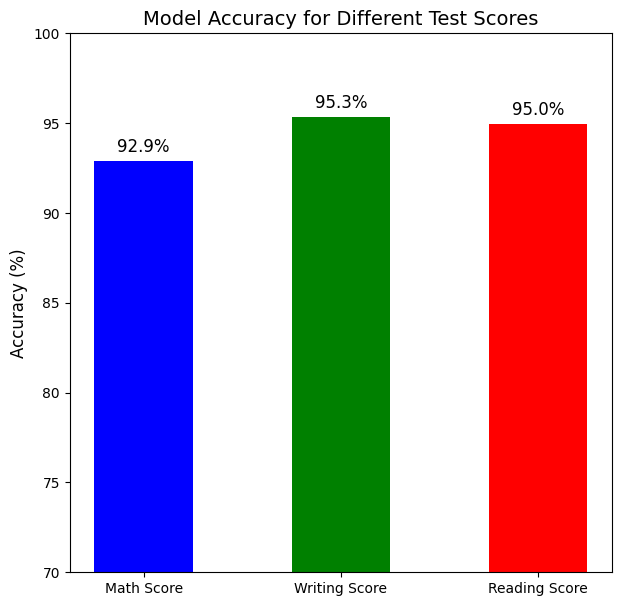

In [69]:
import matplotlib.pyplot as plt

accuracy_math = 100 - MathScoreErrorPercentage
accuracy_reading = 100 - ReadingScoreErrorPercentage
accuracy_writing = 100 - WritingScoreErrorPercentage

labels = ["Math Score", "Writing Score", "Reading Score"]
accuracy_values = [accuracy_math, accuracy_writing, accuracy_reading]

plt.figure(figsize=(7, 7)) 
plt.bar(labels, accuracy_values, color=['blue', 'green', 'red'], width=0.5)
plt.ylim(70, 100)

plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy for Different Test Scores", fontsize=14)

for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12)

plt.show()
